# Análise exploratória

In [27]:
import pandas as pd
import plotly.offline as py
import plotly.graph_objs as go

- A importação **_plotly.graph_objs as go_** é onde vamos criar os gráficos.
- **_plotly.offline as py_** é onde vamos visualizar os gráficos na tela.

## Gráficos de linha

Antes de pltar os gráficos, precisamos tratar a coluna ‘Dt_Customer’ como sendo uma coluna de data. Além disso, vamos criar novas colunas com os anos, meses e dias.

In [28]:
df = pd.read_csv('/content/marketing_campaign.csv', sep="\t")

# Tratando as datas
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
# Criando novas colunas
df['Year_Customer'] = df['Dt_Customer'].dt.year
df['Month_Customer'] = df['Dt_Customer'].dt.month
df['Day_Customer'] = df['Dt_Customer'].dt.day

Isto feito, vamos definir as variáveis avg_income e months como sendo o salário médio por cada mês de 2013 e os meses de 2013, respectivamente.

In [29]:
data = df[df['Year_Customer'] == 2013].groupby('Month_Customer')['Income'].mean()

months = data.index
avg_income = data.values

O gráfico de linha que vamos plotar representa o salário médio dos clientes que chegaram na empresa em cada um dos meses de 2013. </br>
Vamos plotar 3 gráficos diferentes para mostrar que os gráficos de linhas nada mais é que um gráfico de dispersão com uma linha ligando os pontos!

### Gráfico 1

In [43]:
# Criando o gráfico
line1 = go.Scatter(x = months, y = avg_income, mode='lines', name = 'Ligado por linha')

layout = go.Layout(title='Salário médio dos clientes que entraram nos meses de 2013',
                   xaxis={'title': 'Mês'},
                   yaxis={'title': 'Salário Médio'},
                   width=700,
                   height=400)

fig = go.Figure(data = [line1], layout = layout)
py.iplot(fig)

### Gráfico 2

Aqui só trocaremos o mode da função Scatter por **_markers_**.

In [42]:
# Criando o gráfico
line1 = go.Scatter(x = months, y = avg_income, mode='markers', name = 'Ligado por linha')

layout = go.Layout(title='Salário médio dos clientes que entraram nos meses de 2013',
                   xaxis={'title': 'Mês'},
                   yaxis={'title': 'Salário Médio'},
                   width=700,
                   height=400)

fig = go.Figure(data = [line1], layout = layout)
py.iplot(fig)

### Gráfico 3

Agora, no último gráfico, vou gerar um gráfico com duas linhas diferentes. </br>
Das duas linhas, uma será tracejada e a outra pontilhada.

In [44]:
# Criando o gráfico pontilhado
pontilhado = go.Scatter(x = [2019, 2020, 2021, 2022, 2023],
                        y = [60e4, 90e4, 100e4, 80e4, 101e4],
                        mode = 'lines',
                        line = {'color': '#999932', 'dash': 'dot'},
                        name = 'Pontilhado')

# Criando o gráfico tracejado
tracejado = go.Scatter(x = [2019, 2020, 2021, 2022, 2023],
                        y = [30e4, 50e4, 10e4, 35e4, 42e4],
                        mode = 'lines',
                        line = {'color': '#100032', 'dash': 'dash'},
                        name = 'Tracejado')

# Definindo o layout
layout = go.Layout(title = "Faturamento por ano da empresa X",
                   xaxis = {'title': 'Ano'},
                   yaxis = {'title': 'Faturamento'},
                   width=700,
                   height=400)

fig = go.Figure(data = [pontilhado, tracejado], layout = layout)
py.iplot(fig)

#### Principais parâmetros



##### 1. Scatter
- *x:* valores do eixo x (ex: months).
- *y:* valores do eixo y (ex: avg_income).
- *mode:* define o estilo de visualização. Pode ser:
  - *'lines':* apenas linhas
  - *'markers':* apenas pontos
  - *'lines+markers':* linha conectando os pontos e marcadores nos pontos
- *name:* nome da série de dados, aparece na legenda.
- *marker:* customização dos pontos (ex: cor, tamanho).
- *line:* customização das linhas (espessura, tipo).
- *text:* texto que aparece ao passar o mouse.
- *hoverinfo:* quais informações mostrar no hover.

##### 2. Layout
- *title:* título do gráfico.
- *xaxis:* configurações do eixo X, como:
  - *'title':* título do eixo X.
  - *'tickangle':* inclinação dos valores no eixo.
  - *'range':* limites do eixo.
  - *'showgrid':* exibir ou não a grade.
- *yaxis:* configurações do eixo Y (mesmos atributos do xaxis).
- *showlegend:* se a legenda será exibida.
- *template:* estilo do gráfico (ex: "plotly_dark", "ggplot2").
-*height / width:* tamanho do gráfico.



## Gráfico de dispersão

In [45]:
# Criando o gráfico de dispersão
scatter = go.Scatter(x = df.Year_Birth, y = df.Income, mode = 'markers',
                     marker={'color': '#000053'}, opacity =  0.5,
                             hovertemplate =  "Salário U$%{y}")

layout = go.Layout(title = 'Salários por ano de nascimento',
                   title_font = {'family': 'Gotham', 'size': 25, 'color': '#0e78a3'},
                   xaxis = {'title': 'Ano de Nascimento'},
                   yaxis = {'title': 'Salário'},
                   width=700,
                   height=400)

fig = go.Figure(data = [scatter], layout = layout)
py.iplot(fig)

## Gráfico de barras

Vamos agora para um dos gráficos mais utilizados durante uma EDA: o gráfico de barras! </br>Ele é muito utilizado devido à presença de variáveis qualitativas no nosso dataset, permitindo-nos mesclar variáveis qualitativas com quantitativas.

### Gráfico 1

In [46]:
educational_level = df['Education'].value_counts().sort_values(ascending=True).index
quantify = df['Education'].value_counts().sort_values(ascending=True).values

# Criando o gráfico de barras
barras = go.Bar(x = educational_level, y = quantify,
                marker = {'color': '#ff9f43'})

layout = go.Layout(title = 'Quantidade de pessoas por nível educacional',
                   title_font = {'family': 'Gotham', 'size': 25, 'color': '#0e78a3'},
                   xaxis = {'title': 'Nível educacional'},
                   yaxis = {'title': 'Quantidade de pessoas'},
                   width=700,
                   height=400)

fig = go.Figure(data = [barras], layout = layout)

py.iplot(fig)

### Gráfico 2

Podemos comparar duas barras, colocando uma ao lado da outra ou empilhando elas.

In [35]:
# Definindo as variáveis - Solteiros
educational_level_single = df[df['Marital_Status'] == 'Single']['Education'].value_counts(1) \
.sort_values(ascending=True).index

quantity_single = df[df['Marital_Status'] == 'Single']['Education'].value_counts(1) \
.sort_values(ascending=True).values

# Definindo as variáveis - Não Solteiros
educational_level_notsingle = df[df['Marital_Status'] != 'Single']['Education'].value_counts(1). \
sort_values(ascending=True).index

quantity_notsingle = df[df['Marital_Status'] != 'Single']['Education'].value_counts(1) \
.sort_values(ascending=True).values


In [47]:
barra_single = go.Bar(x = educational_level_single, y = quantity_single,
                marker = {'color': '#ff9f43'},
                name = 'Solteiros',
                hovertemplate = "Porcentagem %{y:.3}%")

barra_notsingle = go.Bar(x = educational_level_notsingle, y = quantity_notsingle,
                marker = {'color': '#feca57'},
                name = 'Não Solteiros',
                hovertemplate = "Porcentagem %{y:.3}%")

layout = go.Layout(title = 'Quantidade de pessoas por nível educacional',
                   title_font = {'family': 'Gotham', 'size': 25, 'color': '#0e78a3'},
                   xaxis = {'title': 'Nível educacional'},
                   yaxis = {'title': 'Quantidade de pessoas (%)'},
                   width=700,
                   height=400)

fig = go.Figure(data = [barra_single, barra_notsingle], layout = layout)

py.iplot(fig)

Para empilhar basta coloar o parâmetro **_barmode = 'stack'_** na função *Layout*

In [48]:
layout = go.Layout(title = 'Quantidade de pessoas por nível educacional',
                   title_font = {'family': 'Gotham', 'size': 25, 'color': '#0e78a3'},
                   barmode = 'stack',
                   xaxis = {'title': 'Nível educacional'},
                   yaxis = {'title': 'Quantidade de pessoas (%)'},
                   width=700,
                   height=400)

fig = go.Figure(data = [barra_single, barra_notsingle], layout = layout)

py.iplot(fig)

## Gráfico boxplot

Esse gráfico tão importante quando falamos de análise de outliers e da distribuição dos dados, no sentido de percentis.

In [49]:
boxplot_2ncycle = go.Box(y = df.loc[df['Education'] == '2n Cycle', 'Income'],
                         marker = {'color': '#00CED1'}, name = '2n Cycle')

boxplot_basic = go.Box(y = df.loc[df['Education'] == 'Basic', 'Income'],
                       marker = {'color': '#FF6F61'}, name = 'Basic')

boxplot_graduation = go.Box(y = df.loc[df['Education'] == 'Graduation', 'Income'],
                            marker = {'color': '#FFD700'}, name = 'Graduation')

boxplot_master = go.Box(y = df.loc[df['Education'] == 'Master', 'Income'],
                        marker = {'color': '#C71585'}, name = 'Master')

boxplot_phd = go.Box(y = df.loc[df['Education'] == 'PhD', 'Income'],
                     marker = {'color': '#778899'}, name = 'PhD')

layout = go.Layout(title = "Quantidade de pessoas por nível educacional",
                   title_font = {'family': 'Gotham', 'size': 25, 'color': '#0e78a3'},
                   xaxis = {'title': 'Nível Educacional'},
                   yaxis = {'title': 'Quantidade de pessoas (%)'},
                   barmode = 'stack',
                   width=700,
                   height=400)

fig = go.Figure(data = [boxplot_2ncycle, boxplot_basic, boxplot_graduation, boxplot_master, boxplot_phd],
                layout = layout)

py.iplot(fig)


A diferença do plotly para as outras bibliotecas (Matplotlib e Seaborn) é que podemos interagir com o gráfico. <br>

### 1. Filtrar por categoria

Podemos filtrar por alguma categoria desejada.

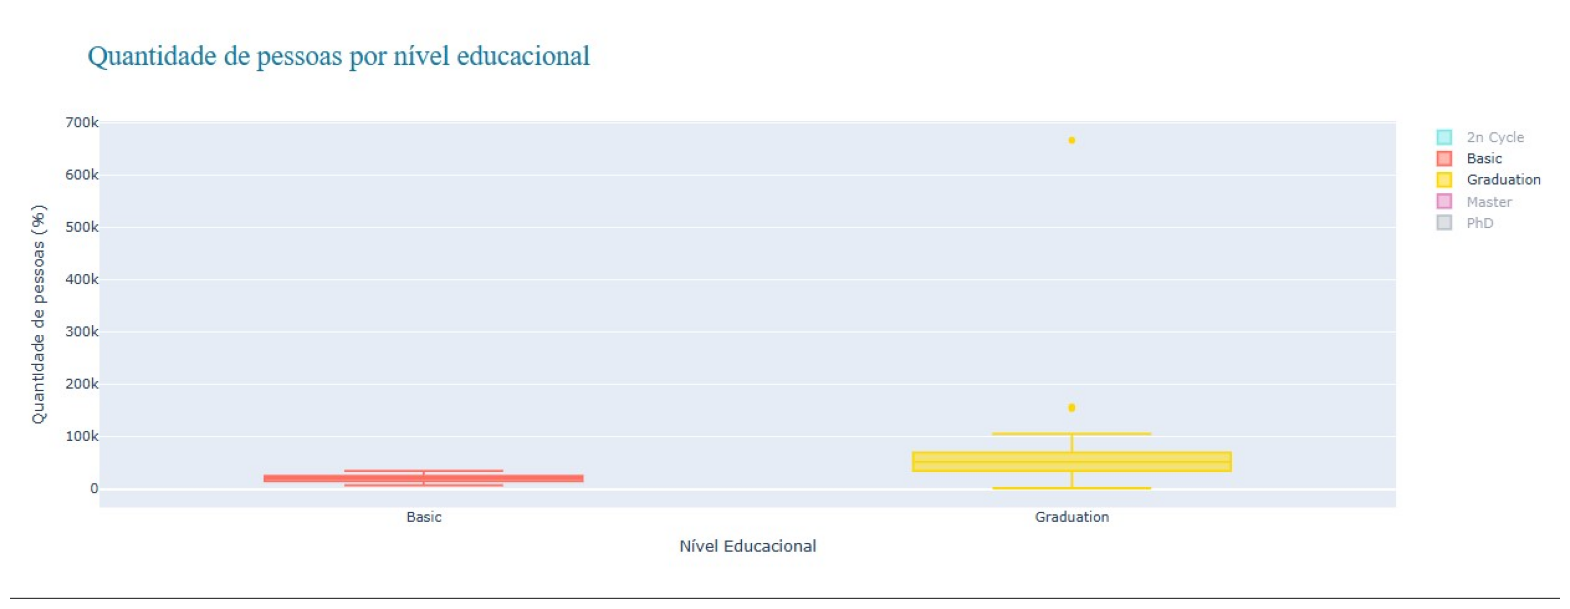

In [39]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Lê a imagem
img = mpimg.imread('exemplo-boxplot1.jpg')

# Define o tamanho da figura (largura=10, altura=6)
plt.figure(figsize=(20, 12))

# Mostra a imagem
plt.imshow(img)
plt.axis('off')  # Oculta os eixos
plt.show()


### 2. Selecionar uma parte

Podemos também selecionar uma parte, basta clicar com o botão esquerdo do mouse e arrastar para selecionar a parte.

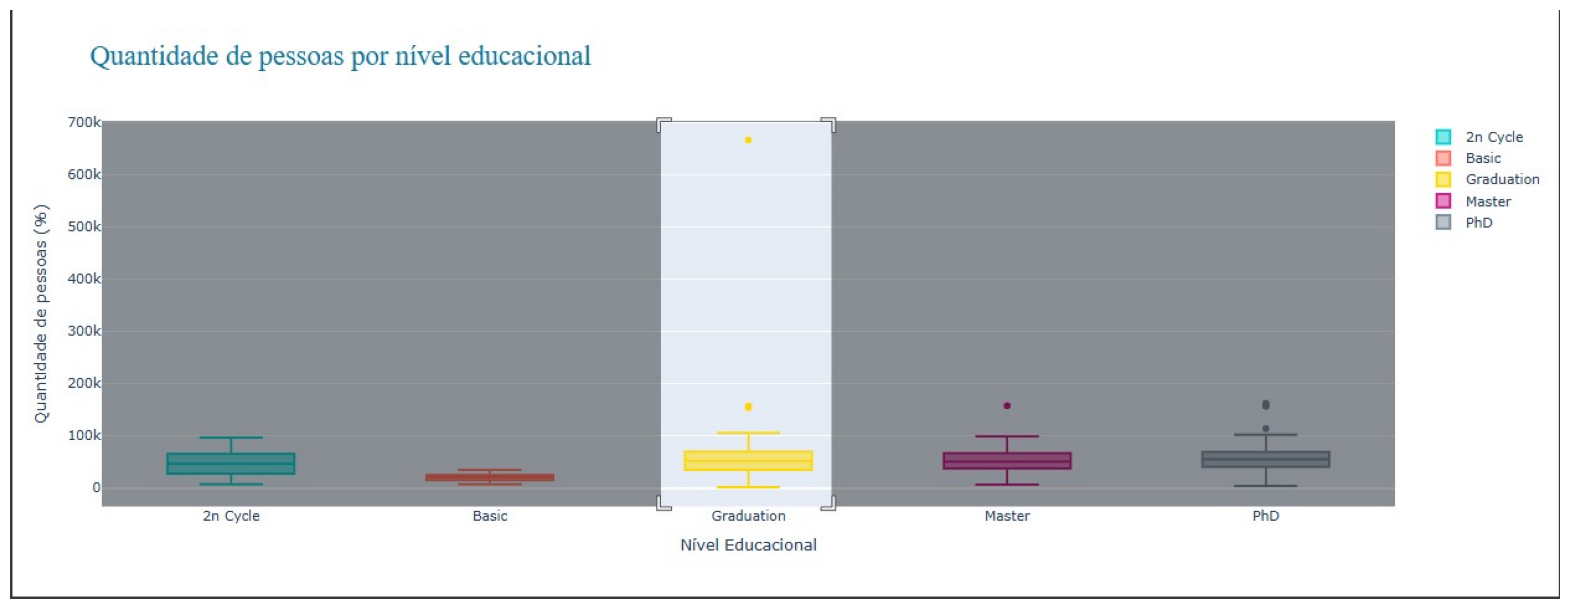

In [40]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Lê a imagem
img = mpimg.imread('exemplo-boxplot2.jpg')

# Define o tamanho da figura (largura=10, altura=6)
plt.figure(figsize=(20, 12))

# Mostra a imagem
plt.imshow(img)
plt.axis('off')  # Oculta os eixos
plt.show()


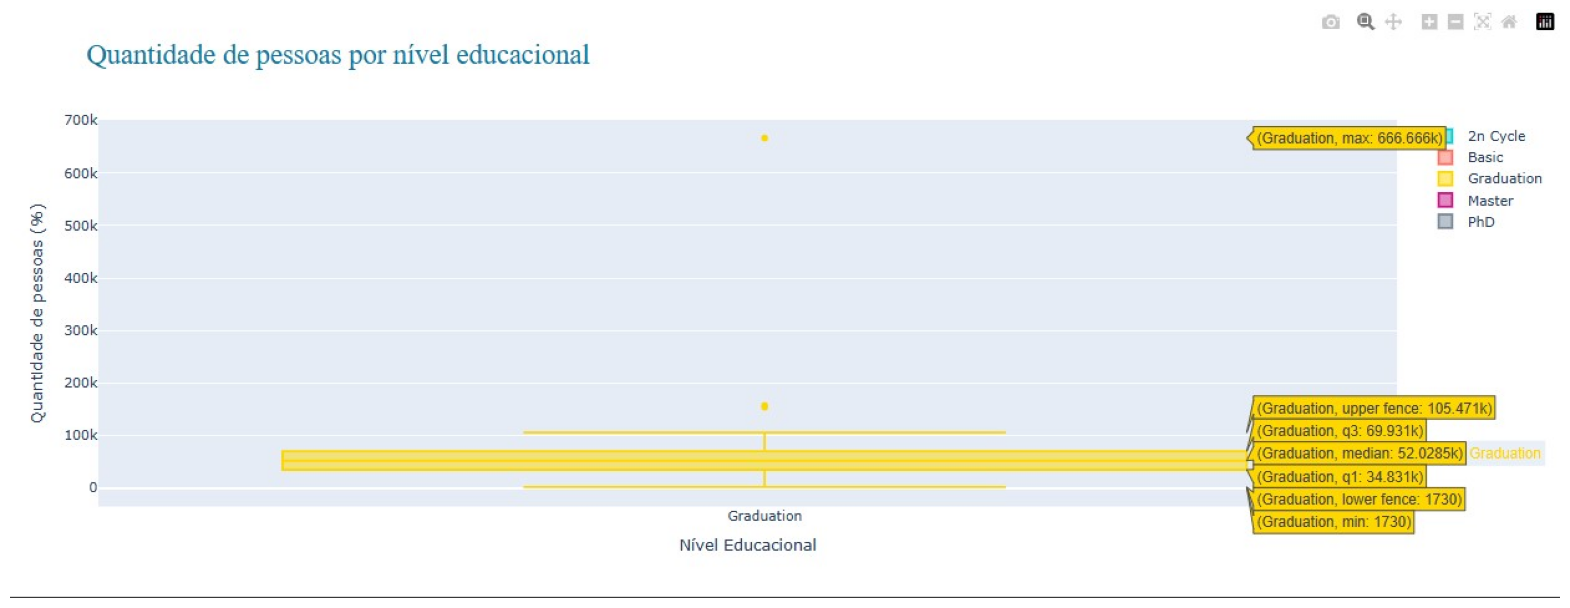

In [41]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Lê a imagem
img = mpimg.imread('exemplo-boxplot3.jpg')

# Define o tamanho da figura (largura=10, altura=6)
plt.figure(figsize=(20, 12))

# Mostra a imagem
plt.imshow(img)
plt.axis('off')  # Oculta os eixos
plt.show()
